In [8]:
# Import libraries
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.signal import spectrogram

In [3]:
# Read in Bad Romance as numpy array, sum left-right channels
fs, data = wav.read('BadRomance.wav')
data_sum = np.sum(data, 1)

In [4]:
# Take one-sided fft of Bad Romance
f, t, Sxx = spectrogram(data_sum, fs=44100, nperseg = 2048, noverlap=1024, return_onesided=True, mode='magnitude')
Sxx = Sxx/2048

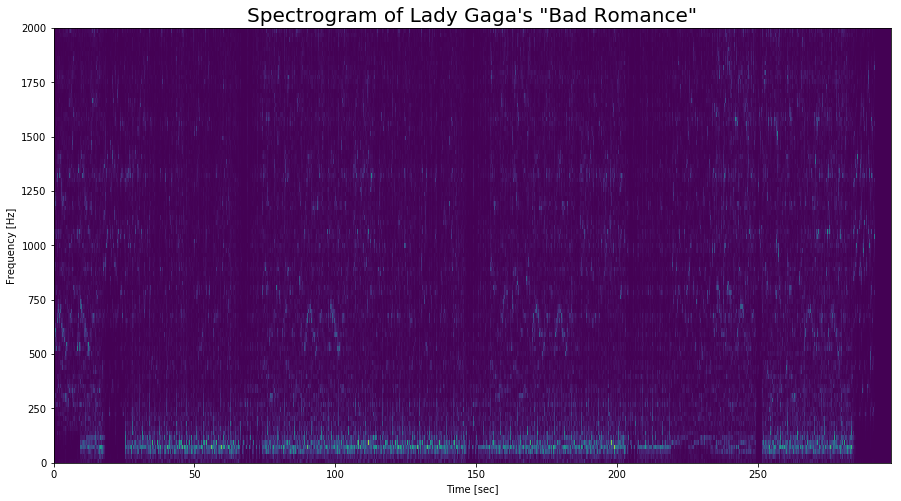

In [16]:
# Plot
plt.figure(figsize=(15,8))
plt.pcolormesh(t,f, Sxx)
plt.ylim([0,2000])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of Lady Gaga\'s "Bad Romance"', fontsize=20)
plt.show()